In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
colnames=['timestamp', 'game_name', 'hourly_channels', 'hourly_viewership'] 
sully = pd.read_csv('./Data/Natasha.csv', names=colnames, header=None)

In [9]:
sully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092036 entries, 0 to 2092035
Data columns (total 4 columns):
timestamp            object
game_name            object
hourly_channels      int64
hourly_viewership    int64
dtypes: int64(2), object(2)
memory usage: 63.8+ MB


In [10]:
sully['game_name'].nunique()

22249

In [8]:
sully.head(10)

,timestamp,game_name,hourly_channels,hourly_viewership
0,2019-04-22 00:00:00.000,League of Legends,3160,97898
1,2019-04-22 00:00:00.000,Counter-Strike: Global Offensive,1246,54330
2,2019-04-22 00:00:00.000,Ultra Street Fighter IV,2,144
3,2019-04-22 00:00:00.000,Hearthstone,224,33632
4,2019-04-22 00:00:00.000,Dota 2,467,27497
5,2019-04-22 00:00:00.000,Super Smash Bros. Melee,17,14778
6,2019-04-22 00:00:00.000,Super Smash Bros. for Wii U,1,6
7,2019-04-22 00:00:00.000,Destiny,22,69
8,2019-04-22 00:00:00.000,Minecraft,788,7713
9,2019-04-22 00:00:00.000,Rocket League,452,4455


In [8]:
sully[sully['game_name']=='Fortnite']['hourly_channels'].diff()

1273          NaN
3685       -767.0
6073      -1234.0
8422      -1424.0
10691     -1727.0
12811     -1797.0
14746     -1302.0
16553      -787.0
18290      -228.0
19963       249.0
21650       247.0
23409      -563.0
25282       967.0
27296      1511.0
29446      1486.0
31739      1318.0
34086      1473.0
36495      2039.0
38993       310.0
41625        28.0
44288       -37.0
46917       130.0
49433       131.0
51883       370.0
54323       358.0
56825      -827.0
59377     -1875.0
61837     -2182.0
64166     -2132.0
66312     -1818.0
            ...  
2023283     887.0
2025897     750.0
2028558     106.0
2031141    -256.0
2033709     -65.0
2036224    -144.0
2038786    -803.0
2041362    -910.0
2043889   -1238.0
2046270   -1585.0
2048507   -1480.0
2050552   -1077.0
2052419    -747.0
2054196    -234.0
2055911     141.0
2057670     264.0
2059496     300.0
2061388     534.0
2063449    1000.0
2065705    1034.0
2067999     847.0
2070364     893.0
2072794     813.0
2075284     997.0
2077911   

In [27]:
sully.describe()

,hourly_channels,hourly_viewership,views_per_channel
count,2.092036e+06,2.092036e+06,2.092036e+06
mean,1.996948e+01,5.517764e+02,1.938367e+01
std,2.405983e+02,6.378626e+03,1.791831e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e+00
50%,1.000000e+00,6.000000e+00,3.500000e+00
75%,4.000000e+00,3.100000e+01,8.500000e+00
max,4.169200e+04,7.039990e+05,4.167200e+04


In [55]:
overall_trend = sully.groupby('timestamp')[['game_name','hourly_channels', 'hourly_viewership']].sum()

In [56]:
overall_trend['channels_change'] = overall_trend['hourly_channels'].diff()

In [57]:
overall_trend

,hourly_channels,hourly_viewership,channels_change
timestamp,,,
2019-04-22 00:00:00.000,55231,1385300,NaN
2019-04-22 01:00:00.000,51329,1225149,-3902.0
2019-04-22 02:00:00.000,49046,1128918,-2283.0
2019-04-22 03:00:00.000,46452,997837,-2594.0
2019-04-22 04:00:00.000,41559,963424,-4893.0
2019-04-22 05:00:00.000,35596,850290,-5963.0
2019-04-22 06:00:00.000,30250,804375,-5346.0
2019-04-22 07:00:00.000,26618,727754,-3632.0
2019-04-22 08:00:00.000,25154,691100,-1464.0


In [58]:
overall_trend['viewership_change'] = overall_trend['hourly_viewership'].diff()

In [45]:
overall_trend = overall_trend.reset_index()

In [47]:
overall_trend

,timestamp,hourly_channels,hourly_viewership,channels_change,viewership_change
0,2019-04-22 00:00:00.000,55231,1385300,NaN,NaN
1,2019-04-22 01:00:00.000,51329,1225149,-3902.0,-160151.0
2,2019-04-22 02:00:00.000,49046,1128918,-2283.0,-96231.0
3,2019-04-22 03:00:00.000,46452,997837,-2594.0,-131081.0
4,2019-04-22 04:00:00.000,41559,963424,-4893.0,-34413.0
5,2019-04-22 05:00:00.000,35596,850290,-5963.0,-113134.0
6,2019-04-22 06:00:00.000,30250,804375,-5346.0,-45915.0
7,2019-04-22 07:00:00.000,26618,727754,-3632.0,-76621.0
8,2019-04-22 08:00:00.000,25154,691100,-1464.0,-36654.0
9,2019-04-22 09:00:00.000,25739,704607,585.0,13507.0


In [46]:
overall_trend.to_csv('overall_trend.csv', index = False)

In [42]:
sully['timestamp'] = pd.to_datetime(sully['timestamp'])

In [43]:
sully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092036 entries, 0 to 2092035
Data columns (total 5 columns):
timestamp            datetime64[ns]
game_name            object
hourly_channels      int64
hourly_viewership    int64
views_per_channel    float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 79.8+ MB


In [19]:
sully['views_per_channel'] = sully['hourly_viewership']/sully['hourly_channels']

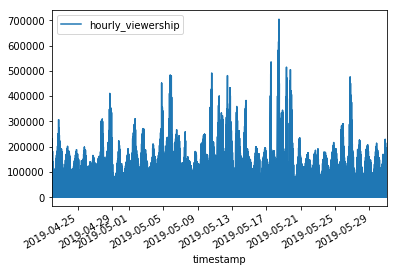

In [45]:
sully.plot.line(x = 'timestamp', y = 'hourly_viewership')

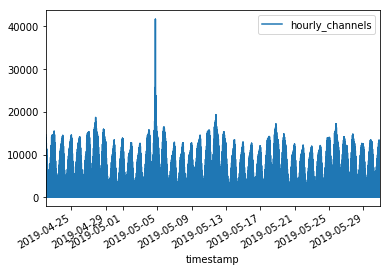

In [46]:
sully.plot.line(x = 'timestamp', y = 'hourly_channels')

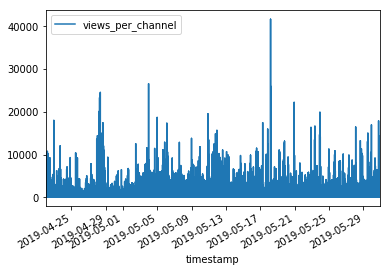

In [25]:
sully.plot.line(x = 'timestamp', y = 'views_per_channel')

In [32]:
trend_views = sully.groupby('game_name').mean().sort_values(by = 'hourly_viewership', ascending = False)

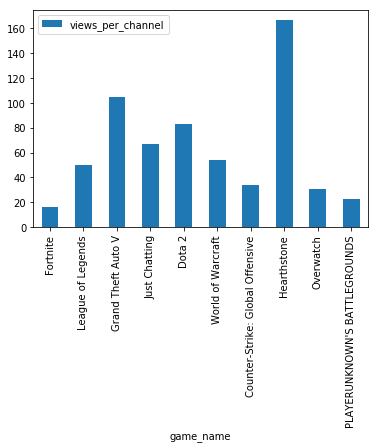

In [33]:
trend_views.head(10).plot.bar(y = 'views_per_channel')

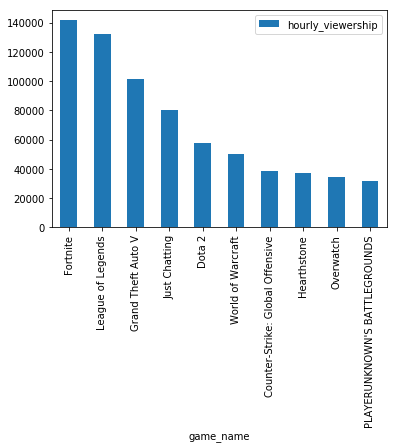

In [27]:
trend_views.head(10).plot.bar(y = 'hourly_viewership')

In [22]:
trend_channel = sully.groupby('game_name').mean().sort_values(by = 'hourly_channels', ascending = False)

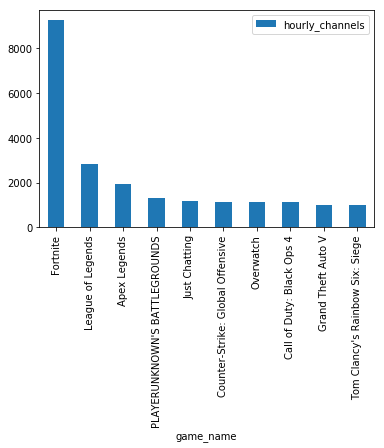

In [35]:
trend_channel.head(10).plot.bar(y = 'hourly_channels')

In [36]:
sully.sample(10)

,timestamp,game_name,hourly_channels,hourly_viewership,views_per_channel
1092916,2019-05-12 08:00:00,The Legend of Heroes: Trails of Cold Steel III,1,12,12.000000
596196,2019-05-03 04:00:00,Kitten Madness,1,2,2.000000
169954,2019-04-25 04:00:00,Just Dance 2019,5,117,23.400000
887304,2019-05-08 14:00:00,pop'n music,1,0,0.000000
265514,2019-04-27 01:00:00,Shadowrun: Dragonfall - Director's Cut,1,13,13.000000
858755,2019-05-08 00:00:00,Helldivers,1,5,5.000000
1585946,2019-05-21 16:00:00,Abyss: The Wraiths of Eden,1,0,0.000000
386756,2019-04-29 05:00:00,Need for Speed Underground 2,1,0,0.000000
2008619,2019-05-29 13:00:00,XCOM: Enemy Within,3,82,27.333333
254730,2019-04-26 21:00:00,Minecraft,979,11935,12.191011


In [18]:
trend_channel.head(3)

,hourly_channels,hourly_viewership
game_name,,
Fortnite,9246.092850,141626.512273
League of Legends,2823.008538,132211.368196
Apex Legends,1951.575240,20500.690502


In [25]:
trend = trend_channel[(trend_channel['hourly_viewership']>5) & (trend_channel['hourly_channels']>8)]

In [26]:
trend.sort_values(by = 'views_per_channel', ascending = False)

,hourly_channels,hourly_viewership,views_per_channel
game_name,,,
Total War: Three Kingdoms,105.071253,12964.722359,360.722637
Nioh 2,10.250000,2712.952128,202.489032
Hearthstone,235.426894,37332.943436,166.165491
TrackMania² Stadium,13.896861,3250.486547,133.840883
Draugen,9.428571,467.314286,130.174650
Slots,63.561366,8405.331910,124.189234
Super Mario Maker,21.044824,1859.209178,115.067152
Layers of Fear 2,111.729167,11025.250000,114.742085
Special Events,17.133404,2896.452508,113.911971
